In [1]:
import pandas as pd

In [2]:
df_score = pd.read_csv("df_score_CMA.csv")

df_score.head()

,AREA,AVG_INCOME_2006,AVG_VALUE_DWELLINGS_2006,POSTSECONDARY_PCT_2006,MANAGEMENT_PCT_2006,AVG_INCOME_2016,AVG_VALUE_DWELLINGS_2016,POSTSECONDARY_PCT_2016,MANAGEMENT_PCT_2016,SCORE_2006,SCORE_2016
0,Arbutus-Ridge,48496,903780,0.652721,0.162296,62675,2500033,0.649560,0.193358,0.087827,1.804875
1,Downtown,43365,563128,0.685047,0.175480,63251,941493,0.767143,0.177683,-0.176166,0.711913
2,Dunbar-Southlands,59270,985837,0.704161,0.163677,78117,3026785,0.691400,0.176039,0.484469,2.551345
3,Fairview,45491,430372,0.760833,0.142999,61627,761230,0.792365,0.138007,-0.256535,0.390038
4,Grandview-Woodland,26713,416736,0.546234,0.075482,42896,899002,0.625699,0.100157,-1.369576,-0.378640


In [3]:
#rank areas based on their scores

df_score["RANK_2006"] = df_score["SCORE_2006"].rank(ascending=False)
df_score["RANK_2016"] = df_score["SCORE_2016"].rank(ascending=False)

df_score.head()

,AREA,AVG_INCOME_2006,AVG_VALUE_DWELLINGS_2006,POSTSECONDARY_PCT_2006,MANAGEMENT_PCT_2006,AVG_INCOME_2016,AVG_VALUE_DWELLINGS_2016,POSTSECONDARY_PCT_2016,MANAGEMENT_PCT_2016,SCORE_2006,SCORE_2016,RANK_2006,RANK_2016
0,Arbutus-Ridge,48496,903780,0.652721,0.162296,62675,2500033,0.649560,0.193358,0.087827,1.804875,5.0,5.0
1,Downtown,43365,563128,0.685047,0.175480,63251,941493,0.767143,0.177683,-0.176166,0.711913,8.0,9.0
2,Dunbar-Southlands,59270,985837,0.704161,0.163677,78117,3026785,0.691400,0.176039,0.484469,2.551345,4.0,2.0
3,Fairview,45491,430372,0.760833,0.142999,61627,761230,0.792365,0.138007,-0.256535,0.390038,10.0,11.0
4,Grandview-Woodland,26713,416736,0.546234,0.075482,42896,899002,0.625699,0.100157,-1.369576,-0.378640,17.0,16.0


In [4]:
#capturing rank changes

df_score["RANK_CHANGE"] = df_score["RANK_2006"] - df_score["RANK_2016"]

df_score.head()

,AREA,AVG_INCOME_2006,AVG_VALUE_DWELLINGS_2006,POSTSECONDARY_PCT_2006,MANAGEMENT_PCT_2006,AVG_INCOME_2016,AVG_VALUE_DWELLINGS_2016,POSTSECONDARY_PCT_2016,MANAGEMENT_PCT_2016,SCORE_2006,SCORE_2016,RANK_2006,RANK_2016,RANK_CHANGE
0,Arbutus-Ridge,48496,903780,0.652721,0.162296,62675,2500033,0.649560,0.193358,0.087827,1.804875,5.0,5.0,0.0
1,Downtown,43365,563128,0.685047,0.175480,63251,941493,0.767143,0.177683,-0.176166,0.711913,8.0,9.0,-1.0
2,Dunbar-Southlands,59270,985837,0.704161,0.163677,78117,3026785,0.691400,0.176039,0.484469,2.551345,4.0,2.0,2.0
3,Fairview,45491,430372,0.760833,0.142999,61627,761230,0.792365,0.138007,-0.256535,0.390038,10.0,11.0,-1.0
4,Grandview-Woodland,26713,416736,0.546234,0.075482,42896,899002,0.625699,0.100157,-1.369576,-0.378640,17.0,16.0,1.0


In [5]:
# descriptive statistics for rank changes

df_score["RANK_CHANGE"].describe()

count    23.000000
mean      0.000000
std       1.651446
min      -3.000000
25%      -1.000000
50%       0.000000
75%       1.000000
max       3.000000
Name: RANK_CHANGE, dtype: float64

<Axes: >

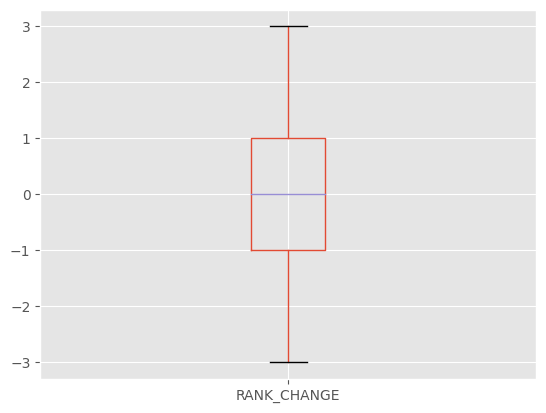

In [6]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

df_score[["RANK_CHANGE"]].boxplot()

In [7]:
# calculate rank changes z-scores

from scipy.stats import zscore

df_score["Z_SCORE"] = df_score[["RANK_CHANGE"]].apply(zscore)

df_score["Z_SCORE"].describe()

count    23.000000
mean      0.000000
std       1.022475
min      -1.857418
25%      -0.619139
50%       0.000000
75%       0.619139
max       1.857418
Name: Z_SCORE, dtype: float64

In [8]:
# assign area status based on z-scores of rank changes (z<-1: area in decline (dec); -1<z<1: stable area (stb); z>1: area in ascension (asc))

df_score["STATUS"] = "stb"

for i in range(len(df_score)):
    if df_score["Z_SCORE"][i] > 1:
        df_score["STATUS"][i] = "asc"
    elif df_score["Z_SCORE"][i] < -1:
        df_score["STATUS"][i] = "dec"
        
df_score

/var/folders/x2/yktmn0x55vb6r1j47trjb5600000gq/T/ipykernel_2018/3630606579.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score["STATUS"][i] = "asc"
/var/folders/x2/yktmn0x55vb6r1j47trjb5600000gq/T/ipykernel_2018/3630606579.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score["STATUS"][i] = "dec"


,AREA,AVG_INCOME_2006,AVG_VALUE_DWELLINGS_2006,POSTSECONDARY_PCT_2006,MANAGEMENT_PCT_2006,AVG_INCOME_2016,AVG_VALUE_DWELLINGS_2016,POSTSECONDARY_PCT_2016,MANAGEMENT_PCT_2016,SCORE_2006,SCORE_2016,RANK_2006,RANK_2016,RANK_CHANGE,Z_SCORE,STATUS
0,Arbutus-Ridge,48496,903780,0.652721,0.162296,62675,2500033,0.649560,0.193358,0.087827,1.804875,5.0,5.0,0.0,0.000000,stb
1,Downtown,43365,563128,0.685047,0.175480,63251,941493,0.767143,0.177683,-0.176166,0.711913,8.0,9.0,-1.0,-0.619139,stb
2,Dunbar-Southlands,59270,985837,0.704161,0.163677,78117,3026785,0.691400,0.176039,0.484469,2.551345,4.0,2.0,2.0,1.238278,asc
3,Fairview,45491,430372,0.760833,0.142999,61627,761230,0.792365,0.138007,-0.256535,0.390038,10.0,11.0,-1.0,-0.619139,stb
4,Grandview-Woodland,26713,416736,0.546234,0.075482,42896,899002,0.625699,0.100157,-1.369576,-0.378640,17.0,16.0,1.0,0.619139,stb
5,Hastings-Sunrise,26916,548064,0.448524,0.069781,38258,1266054,0.470078,0.090885,-1.457668,-0.503170,19.0,18.0,1.0,0.619139,stb
6,Kensington-Cedar Cottage,25757,538034,0.460356,0.065291,38411,1214877,0.521713,0.079011,-1.491605,-0.506723,20.0,19.0,1.0,0.619139,stb
7,Kerrisdale,66543,1115764,0.674839,0.170501,77248,2879632,0.660862,0.157936,0.727851,2.277162,2.0,4.0,-2.0,-1.238278,dec
8,Killarney,29210,502674,0.547803,0.087299,39013,1097209,0.544681,0.095779,-1.188321,-0.467831,16.0,17.0,-1.0,-0.619139,stb
9,Kitsilano,45444,642914,0.754139,0.137262,63092,1327707,0.766710,0.141397,-0.127723,0.842711,6.0,8.0,-2.0,-1.238278,dec


In [9]:
# check size of different area status

df_score.groupby(df_score["STATUS"]).size()

STATUS
asc     5
dec     4
stb    14
dtype: int64

In [10]:
df_score.to_csv('score_analysis_CMA.csv')